# Data Exploration , Cleansing and Data Preparation

1. Import packages
2. Testing null value
3. Conduct some data engineering

###  <span style="color:blue">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

Don't forget that to modify the matplotlib plot sizes so they're at a comfortable reading size you should use the following:

**import matplotlib as mpl**

**mpl.rcParams['figure.figsize'] = (20,5)**

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

In [115]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [116]:
!pip install plotly


In [117]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

## Data description!

In [118]:
df_Pet = pd.read_csv(r'C:\Users\16508\Downloads\Main_Updated_Dataset.csv') 
df_Pet.shape

(138118, 15)

In [119]:
df_Pet

,Animal_ID,NAME,Adopted Date,Pet DOB,Status,Adopted_Age_Days,Adopted_Age_Months,Adopted_Age_Years,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_On_Adop,Age_On_Adop,Breed,Color
0,AA_1,Scamp,20/12/2014,7/9/2007,Y,2661,89,7,Return to Owner,Null,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow&White
1,AA_2,Scamp,7/12/2017,7/9/2007,Y,3744,125,10,Return to Owner,Null,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow&White
2,AA_3,Scamp,8/3/2014,7/9/2007,Y,2374,79,7,Return to Owner,Null,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow&White
3,AA_4,Oreo,7/4/2014,4/2/2004,Y,3715,124,10,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor
4,AA_5,Bandit,16/11/2013,16/10/1997,Y,5875,196,16,Return to Owner,Null,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown&White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138113,AA_138164,NaN,2/11/2022,6/4/2022,Y,210,7,1,Transfer,Out State,Dog,Intact Male,1 month,Catahoula&Labrador Retriever,Tan&White
138114,AA_138203,A854599,3/6/2022,6/4/2022,Y,58,2,0,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Longhair,Brown Tabby
138115,AA_138204,A854600,3/6/2022,6/4/2022,Y,58,2,0,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair,Black&White
138116,AA_138213,156 Grams,4/6/2022,8/4/2022,Y,57,2,0,Transfer,Partner,Cat,Intact Female,2 days,Domestic Shorthair,Brown Tabby


In [120]:
df_Pet.describe()

,Adopted_Age_Days,Adopted_Age_Months,Adopted_Age_Years
count,138118.000000,138118.000000,138118.000000
mean,802.829609,26.747419,2.173945
std,1066.695106,35.574438,2.983831
min,0.000000,0.000000,0.000000
25%,113.000000,4.000000,0.000000
50%,372.000000,12.000000,1.000000
75%,941.000000,31.000000,3.000000
max,10996.000000,367.000000,31.000000


In [121]:
# removing null values to avoid errors  
df_Pet.dropna(inplace = True)
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = df_Pet.describe( include = include) 

desc

,Animal_ID,NAME,Adopted Date,Pet DOB,Status,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_On_Adop,Age_On_Adop,Breed,Color
count,96964,96964,96964,96964,96964,96964,96964,96964,96964,96964,96964,96964
unique,96963,19084,3109,7419,1,9,26,5,5,50,2486,541
top,AA_5248,Max,19/08/2017,9/1/2015,Y,Adoption,Null,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black&White
freq,2,682,155,91,96964,52355,64225,65164,41176,16660,18185,10635


In [122]:
#inplace: By setting it to TRUE, the changes gets stored into a new object that gets created and it does not alter the original dataframe.
df_Pet.drop('Age_On_Adop', inplace=True, axis=1)

In [123]:
df_Pet.drop('Status', inplace=True, axis=1)

In [124]:
df_Pet

,Animal_ID,NAME,Adopted Date,Pet DOB,Adopted_Age_Days,Adopted_Age_Months,Adopted_Age_Years,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_On_Adop,Breed,Color
0,AA_1,Scamp,20/12/2014,7/9/2007,2661,89,7,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White
1,AA_2,Scamp,7/12/2017,7/9/2007,3744,125,10,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White
2,AA_3,Scamp,8/3/2014,7/9/2007,2374,79,7,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White
3,AA_4,Oreo,7/4/2014,4/2/2004,3715,124,10,Transfer,Partner,Dog,Neutered Male,Dachshund,Tricolor
4,AA_5,Bandit,16/11/2013,16/10/1997,5875,196,16,Return to Owner,Null,Dog,Neutered Male,Shetland Sheepdog,Brown&White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138102,AA_137969,197 Grams,3/9/2022,24/03/2022,163,5,0,Transfer,Partner,Cat,Intact Female,Domestic Shorthair Mix,Brown Tabby
138103,AA_138035,Smoke,2/4/2022,28/03/2022,5,0,0,Return to Owner,Null,Dog,Intact Female,Pit Bull Mix,Blue
138114,AA_138203,A854599,3/6/2022,6/4/2022,58,2,0,Transfer,Partner,Cat,Intact Male,Domestic Longhair,Brown Tabby
138115,AA_138204,A854600,3/6/2022,6/4/2022,58,2,0,Transfer,Partner,Cat,Intact Male,Domestic Shorthair,Black&White


In [125]:
# Testing if any null values
print(df_Pet.isnull().sum())

df_Pet.isnull().values.any()

# Conclusion: No null values found

Animal_ID             0
NAME                  0
Adopted Date          0
Pet DOB               0
Adopted_Age_Days      0
Adopted_Age_Months    0
Adopted_Age_Years     0
Outcome_Type          0
Outcome_Subtype       0
Animal_Type           0
Sex_On_Adop           0
Breed                 0
Color                 0
dtype: int64


False

In [126]:
#df_Pet.to_csv(r'C:\Users\16508\Downloads\Pet_dataset_file_Cleaned.csv', index = False)

In [127]:
df_Pet['Outcome_Subtype'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
138102    False
138103    False
138114    False
138115    False
138116    False
Name: Outcome_Subtype, Length: 96964, dtype: bool

## Numerical vs. Categorical Data Types!

In [128]:
df_Pet.dtypes[df_Pet.dtypes=='object']

Animal_ID          object
NAME               object
Adopted Date       object
Pet DOB            object
Outcome_Type       object
Outcome_Subtype    object
Animal_Type        object
Sex_On_Adop        object
Breed              object
Color              object
dtype: object

In [129]:
df_Pet._get_numeric_data().columns

Index(['Adopted_Age_Days', 'Adopted_Age_Months', 'Adopted_Age_Years'], dtype='object')

## DESCRIPTIVE STATISTICS!

In [130]:
# Displays the breeds which has highest count!
df_Pet['Breed'].value_counts().head(10)

Domestic Shorthair Mix       18185
Pit Bull Mix                  8143
Domestic Shorthair            6415
Labrador Retriever Mix        6109
Chihuahua Shorthair Mix       5158
German Shepherd Mix           2857
Domestic Medium Hair Mix      1921
Pit Bull                      1727
Australian Cattle Dog Mix     1428
Domestic Longhair Mix         1055
Name: Breed, dtype: int64

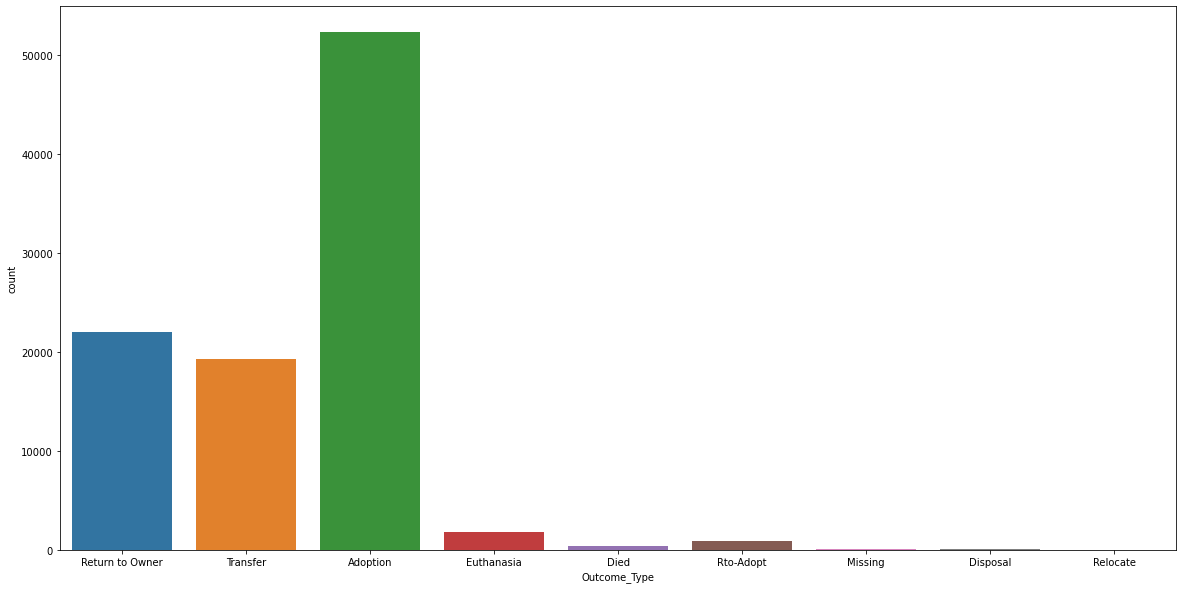

In [131]:
plt.figure(figsize=(20,10))
sns.countplot(x='Outcome_Type', data=df_Pet)


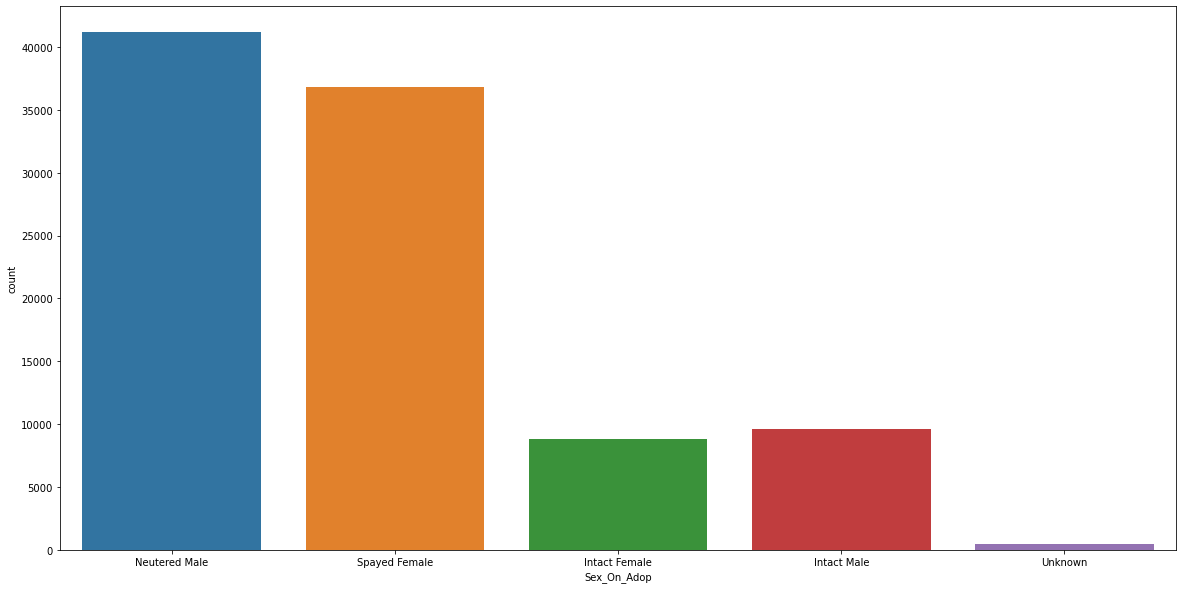

In [132]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sex_On_Adop', data=df_Pet)

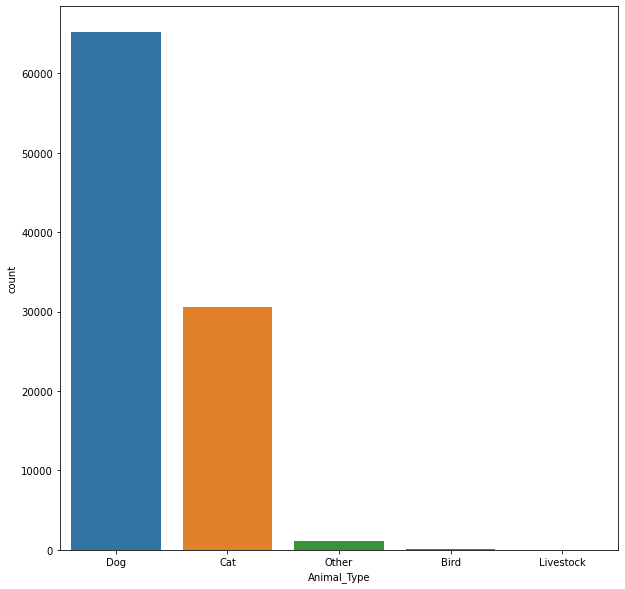

In [133]:
plt.figure(figsize=(10,10))
sns.countplot(x='Animal_Type', data=df_Pet)

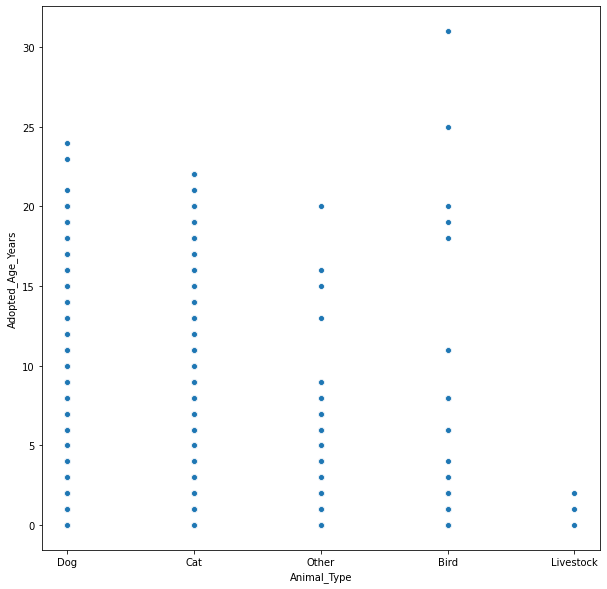

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Animal_Type', y='Adopted_Age_Years', data=df_Pet)
#plt.xticks(rotation=60) 

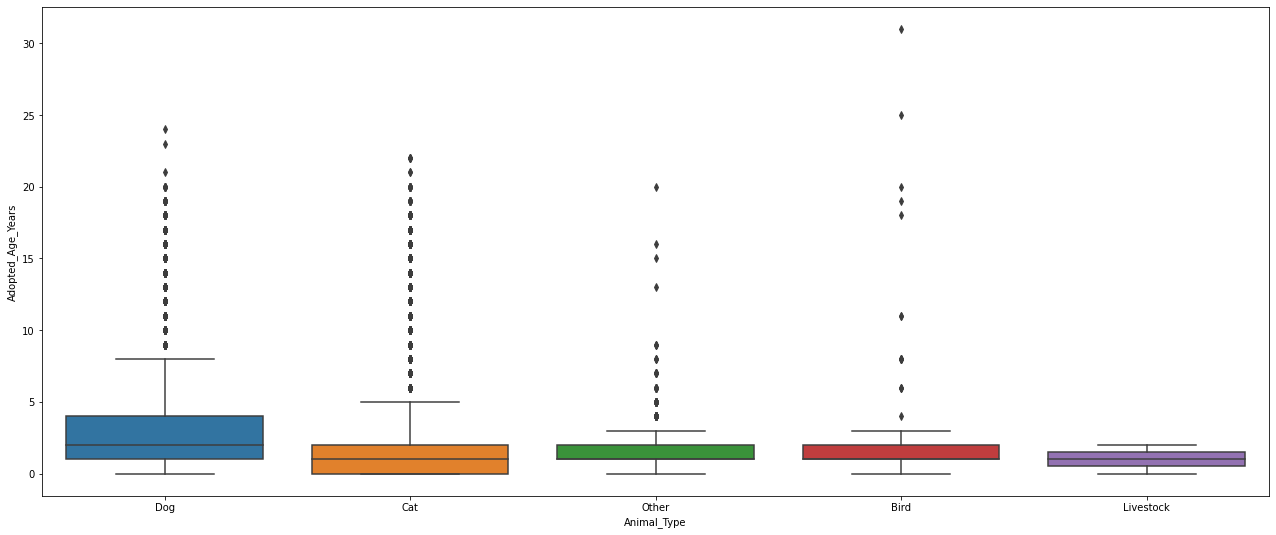

In [135]:
#To understand the outliers!

plt.figure(figsize=(22,9))
sns.boxplot(y='Adopted_Age_Years', x='Animal_Type', data=df_Pet)

## Animal Characteristics Data description!

In [136]:
df_Pet_Char = pd.read_csv(r'C:\Users\16508\Downloads\Animal_Characteristics.csv') 
df_Pet_Char.shape

(138214, 4)

In [137]:
# Testing if any null values
print(df_Pet_Char.isnull().sum())

df_Pet_Char.isnull().values.any()

#Conclusion no null values found.

Animal_ID     0
Condition     0
length(cm)    0
height(cm)    0
dtype: int64


False

In [138]:
df_Pet_Char.describe()

,Condition,length(cm),height(cm)
count,138214.000000,138214.000000,138214.000000
mean,1.503458,49.964334,27.499129
std,1.117463,28.844597,12.998776
min,0.000000,0.001371,5.000339
25%,1.000000,25.034279,16.222927
50%,2.000000,49.965085,27.504958
75%,3.000000,74.867061,38.780491
max,3.000000,99.999806,49.999851


In [139]:
df_Pet_Char.isnull()

,Animal_ID,Condition,length(cm),height(cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
138209,False,False,False,False
138210,False,False,False,False
138211,False,False,False,False
138212,False,False,False,False


In [140]:
df_Pet_Char


,Animal_ID,Condition,length(cm),height(cm)
0,AA_1,2,49.435273,7.397711
1,AA_2,3,64.279624,27.090308
2,AA_3,1,62.866585,38.513557
3,AA_4,1,84.461722,18.538097
4,AA_5,1,91.032094,18.061219
...,...,...,...,...
138209,AA_138210,0,76.701229,25.839672
138210,AA_138211,0,97.543397,45.877206
138211,AA_138212,1,40.013542,29.868723
138212,AA_138213,1,18.822760,32.399963


In [141]:
#df_Pet_Char.to_csv(r'C:\Users\16508\Downloads\Pet_char_dataset_file_Cleaned.csv', index = False)

In [142]:
#Joining both the tables using panda merge function!
mergedRes = pd.merge(df_Pet, df_Pet_Char)
mergedRes

,Animal_ID,NAME,Adopted Date,Pet DOB,Adopted_Age_Days,Adopted_Age_Months,Adopted_Age_Years,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_On_Adop,Breed,Color,Condition,length(cm),height(cm)
0,AA_1,Scamp,20/12/2014,7/9/2007,2661,89,7,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,2,49.435273,7.397711
1,AA_2,Scamp,7/12/2017,7/9/2007,3744,125,10,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,3,64.279624,27.090308
2,AA_3,Scamp,8/3/2014,7/9/2007,2374,79,7,Return to Owner,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,1,62.866585,38.513557
3,AA_4,Oreo,7/4/2014,4/2/2004,3715,124,10,Transfer,Partner,Dog,Neutered Male,Dachshund,Tricolor,1,84.461722,18.538097
4,AA_5,Bandit,16/11/2013,16/10/1997,5875,196,16,Return to Owner,Null,Dog,Neutered Male,Shetland Sheepdog,Brown&White,1,91.032094,18.061219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96959,AA_137969,197 Grams,3/9/2022,24/03/2022,163,5,0,Transfer,Partner,Cat,Intact Female,Domestic Shorthair Mix,Brown Tabby,0,96.225287,46.199370
96960,AA_138035,Smoke,2/4/2022,28/03/2022,5,0,0,Return to Owner,Null,Dog,Intact Female,Pit Bull Mix,Blue,2,26.450476,35.161134
96961,AA_138203,A854599,3/6/2022,6/4/2022,58,2,0,Transfer,Partner,Cat,Intact Male,Domestic Longhair,Brown Tabby,2,20.508418,22.439649
96962,AA_138204,A854600,3/6/2022,6/4/2022,58,2,0,Transfer,Partner,Cat,Intact Male,Domestic Shorthair,Black&White,0,74.977407,48.169271


In [143]:
#mergedRes.to_csv(r'C:\Users\16508\Downloads\Mearged_Petdataset_file_Cleaned.csv', index = False)

In [144]:
# Testing if any null values
print(mergedRes.isnull().sum())

mergedRes.isnull().values.any()

# Conclusion: No null values found

Animal_ID             0
NAME                  0
Adopted Date          0
Pet DOB               0
Adopted_Age_Days      0
Adopted_Age_Months    0
Adopted_Age_Years     0
Outcome_Type          0
Outcome_Subtype       0
Animal_Type           0
Sex_On_Adop           0
Breed                 0
Color                 0
Condition             0
length(cm)            0
height(cm)            0
dtype: int64


False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB5DC2CA60>,
      dtype=object)

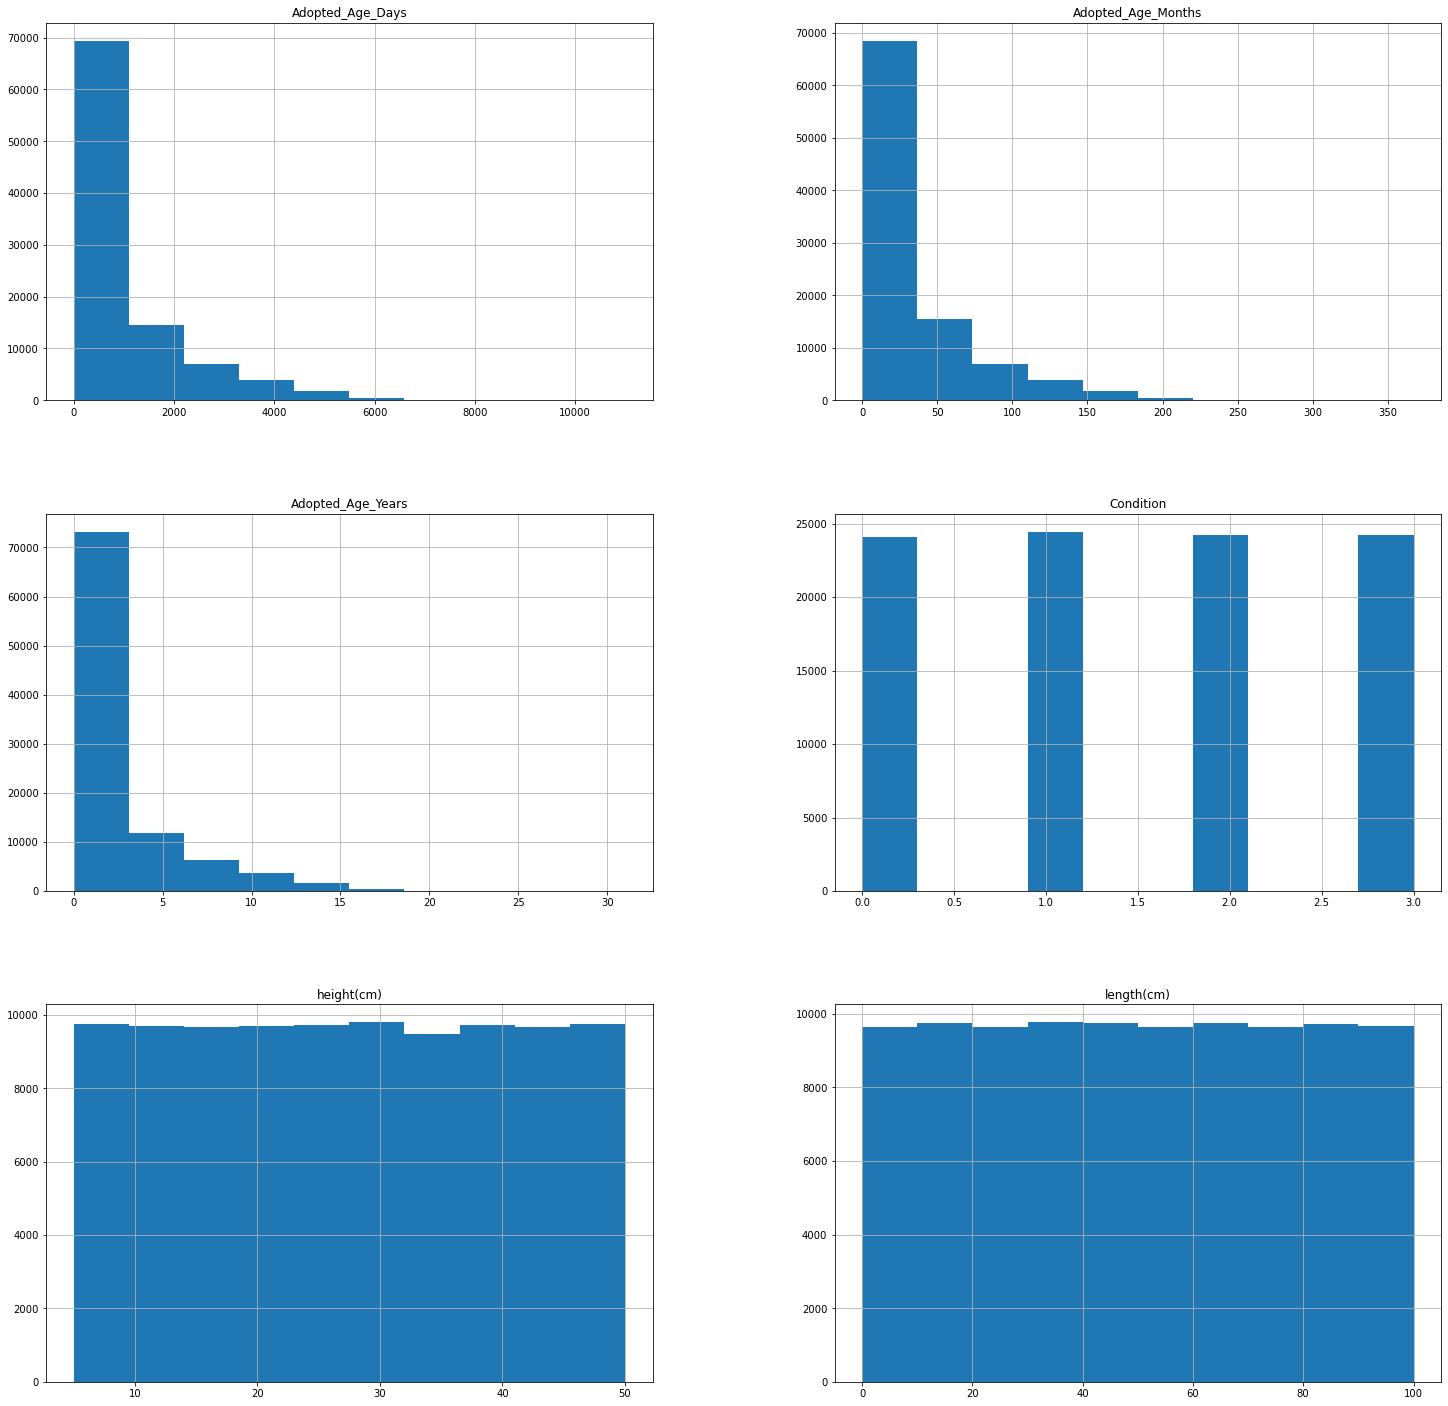

In [145]:
#ploting the histogram for comparing the features!
mergedRes.hist(figsize=(25,25))

## Numerical vs. Categorical Data Types!

In [146]:
mergedRes._get_numeric_data().columns

Index(['Adopted_Age_Days', 'Adopted_Age_Months', 'Adopted_Age_Years',
       'Condition', 'length(cm)', 'height(cm)'],
      dtype='object')

In [147]:
mergedRes.select_dtypes(include=['object']).columns

Index(['Animal_ID', 'NAME', 'Adopted Date', 'Pet DOB', 'Outcome_Type',
       'Outcome_Subtype', 'Animal_Type', 'Sex_On_Adop', 'Breed', 'Color'],
      dtype='object')

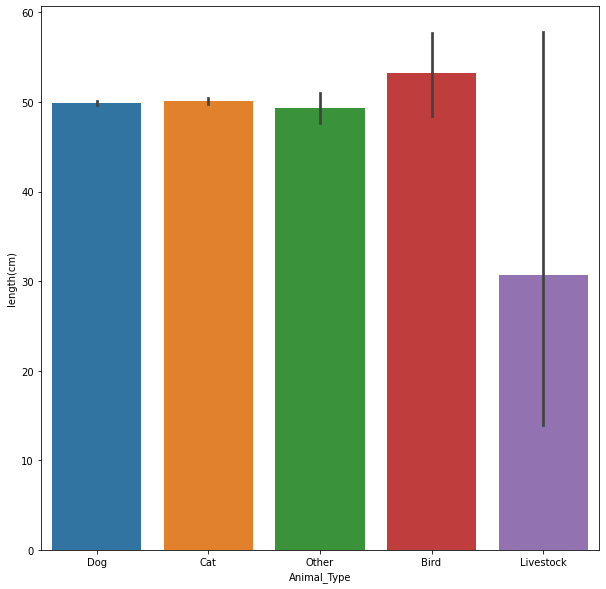

In [148]:
plt.figure(figsize=(10,10))
sns.barplot(x="Animal_Type", y="length(cm)", data=mergedRes)
#plt.xticks(rotation=90)

In [149]:
mergedRes['Outcome_Type'].value_counts()

Adoption           52355
Return to Owner    22043
Transfer           19329
Euthanasia          1856
Rto-Adopt            855
Died                 424
Missing               54
Disposal              47
Relocate               1
Name: Outcome_Type, dtype: int64

In [150]:

#le = LabelEncoder()

#mergedRes['Outcome_Type']= le.fit_transform(mergedRes['Outcome_Type'])

In [151]:
mergedRes['Outcome_Type'].value_counts()

Adoption           52355
Return to Owner    22043
Transfer           19329
Euthanasia          1856
Rto-Adopt            855
Died                 424
Missing               54
Disposal              47
Relocate               1
Name: Outcome_Type, dtype: int64

In [153]:
#plt.figure(figsize=(40,20))
#plt.scatter(x= mergedRes['height(cm)'], y=mergedRes['length(cm)'], c =mergedRes['Outcome_Type'])
#plt.show()

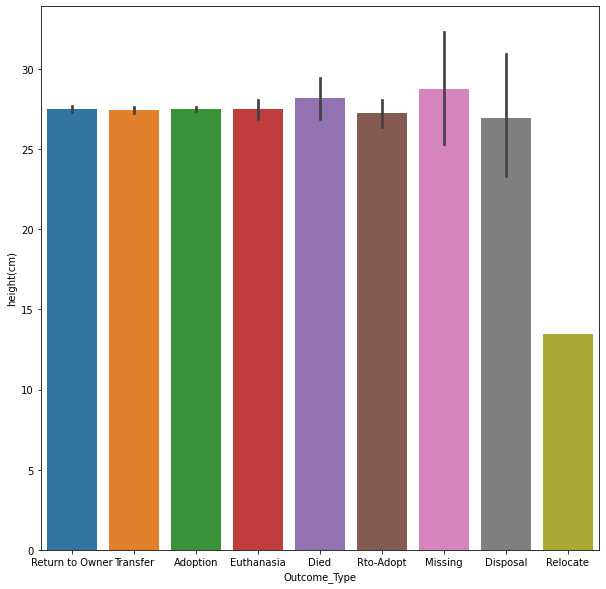

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(x="Outcome_Type", y="height(cm)", data=mergedRes)

In [155]:
le = LabelEncoder()

mergedRes['']= le.fit_transform(mergedRes['Outcome_Type'])

In [156]:
mergedRes['Outcome_Type'].value_counts()

0    52355
6    22043
8    19329
3     1856
7      855
1      424
4       54
2       47
5        1
Name: Outcome_Type, dtype: int64

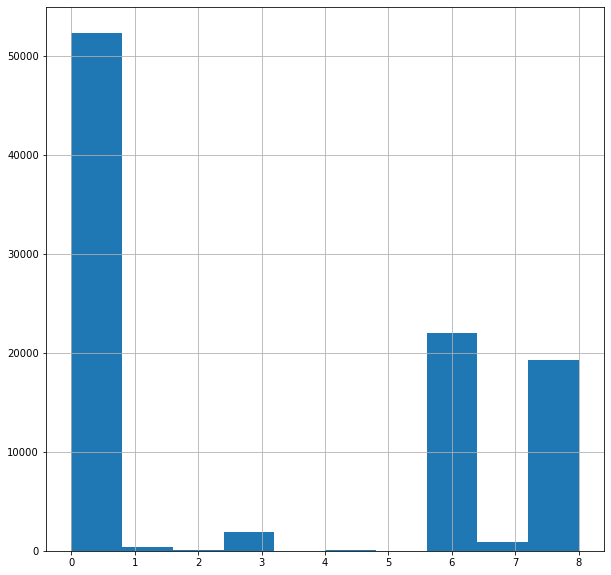

In [166]:
mergedRes['Outcome_Type'].hist(figsize=(10,10))

In [168]:
mergedRes

,Animal_ID,NAME,Adopted Date,Pet DOB,Adopted_Age_Days,Adopted_Age_Months,Adopted_Age_Years,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_On_Adop,Breed,Color,Condition,length(cm),height(cm)
0,AA_1,Scamp,20/12/2014,7/9/2007,2661,89,7,6,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,2,49.435273,7.397711
1,AA_2,Scamp,7/12/2017,7/9/2007,3744,125,10,6,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,3,64.279624,27.090308
2,AA_3,Scamp,8/3/2014,7/9/2007,2374,79,7,6,Null,Dog,Neutered Male,Spinone Italiano Mix,Yellow&White,1,62.866585,38.513557
3,AA_4,Oreo,7/4/2014,4/2/2004,3715,124,10,8,Partner,Dog,Neutered Male,Dachshund,Tricolor,1,84.461722,18.538097
4,AA_5,Bandit,16/11/2013,16/10/1997,5875,196,16,6,Null,Dog,Neutered Male,Shetland Sheepdog,Brown&White,1,91.032094,18.061219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96959,AA_137969,197 Grams,3/9/2022,24/03/2022,163,5,0,8,Partner,Cat,Intact Female,Domestic Shorthair Mix,Brown Tabby,0,96.225287,46.199370
96960,AA_138035,Smoke,2/4/2022,28/03/2022,5,0,0,6,Null,Dog,Intact Female,Pit Bull Mix,Blue,2,26.450476,35.161134
96961,AA_138203,A854599,3/6/2022,6/4/2022,58,2,0,8,Partner,Cat,Intact Male,Domestic Longhair,Brown Tabby,2,20.508418,22.439649
96962,AA_138204,A854600,3/6/2022,6/4/2022,58,2,0,8,Partner,Cat,Intact Male,Domestic Shorthair,Black&White,0,74.977407,48.169271


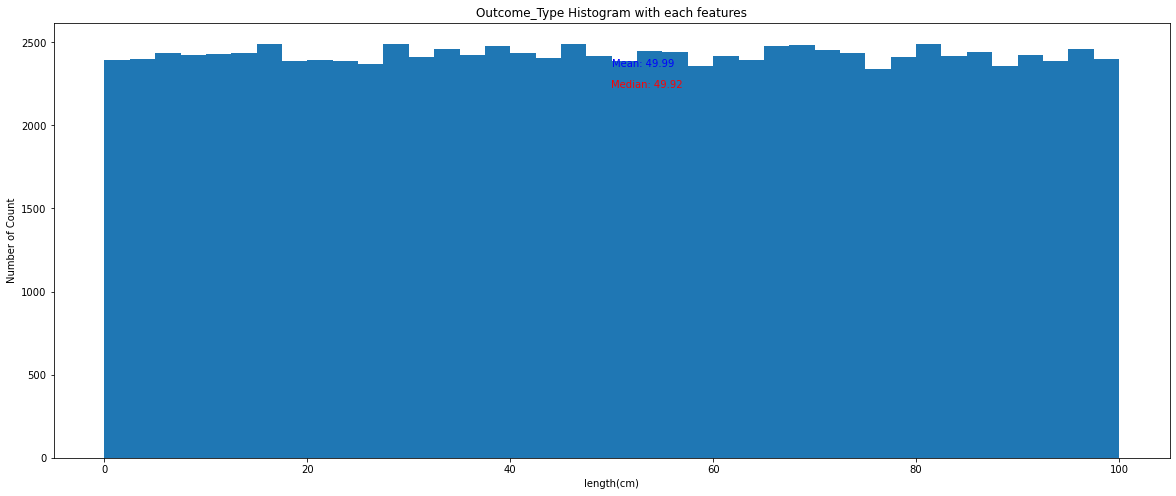

In [164]:
# Create a histogram of Outcome_Type

plt.figure(figsize=(20,8))

_ = plt.hist(mergedRes['length(cm)'], bins=40)

_ = plt.xlabel('length(cm)')

_ = plt.ylabel('Number of Count')

min_ylim, max_ylim = plt.ylim()
plt.text(mergedRes['length(cm)'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(mergedRes['length(cm)'].mean()), color='blue')
plt.text(mergedRes['length(cm)'].median(), max_ylim*0.85, 'Median: {:.2f}'.format(mergedRes['length(cm)'].median()), color='red')

_= plt.title('Outcome_Type Histogram with each features')



## Step 4: Identify Outliers

In [167]:
# Identify number of outliers comparing to whole dataset


Q1=mergedRes.quantile(0.25)
Q3=mergedRes.quantile(0.75)
IQR = Q3-Q1

index=mergedRes.index
num_of_entry=len(index)
print(str(num_of_entry))


olfilter = ~((mergedRes < Q1 - 1.5 * IQR) | (mergedRes > Q3 + 1.5 *IQR)).any(axis=1)
df1= mergedRes[olfilter]  
index1=df1.index
num_of_entry1=len(index1)
print(num_of_entry1)

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(num_of_entry) + " entries") 


#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have removed any outliers from the dataset, we have " + str(num_of_entry1) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(1-num_of_entry1/num_of_entry))



96964
87427
When we have not removed any outliers from the dataset, we have 96964 entries
When we have removed any outliers from the dataset, we have 87427 entries
The proportion of outliers which exist when compared to the dataframe are: 0.09835609092034159


In [ ]:
##Step two-- plot the relationship between price and variables


plt.figure(figsize=(15,15))


plt.title('relationship between Outcome_Type and variables')

plt.subplot(4,4,1)
sns.scatterplot(y='Outcome_Type',x='Animal_Type',data=df);

plt.subplot(4,4,2)
sns.scatterplot(y='Outcome_Type',x='Sqft_lot',data=df);

plt.subplot(4,4,3)
sns.scatterplot(y='Outcome_Type',x='Sqft_living15',data=df);

plt.subplot(4,4,4)
sns.scatterplot(y='Outcome_Type',x='Sqft_lot15',data=df);


plt.subplot(4,4,5)
sns.scatterplot(y='Outcome_Type',x='Sqft_above',data=df);

plt.subplot(4,4,6)
sns.scatterplot(y='Outcome_Type',x='Sqft_basement',data=df);

plt.subplot(4,4,7)
fig = sns.boxplot(x='Bedrooms', y="Outcome_Type", data=df)
fig.axis(ymin=0, ymax=3500000);

plt.subplot(4,4,8)
sns.scatterplot(y='Outcome_Type',x='Bathrooms',data=df);

plt.subplot(4,4,13)
sns.boxplot(x='Condition', y="Outcome_Type", data=df)


plt.tight_layout()
plt.plot()




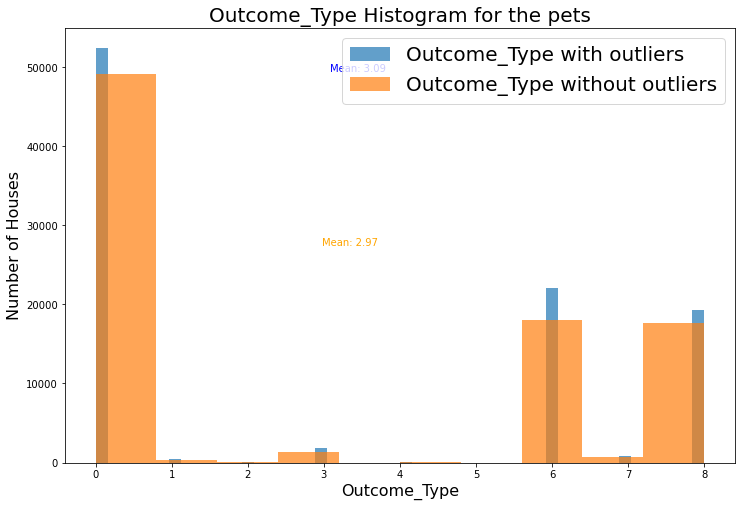

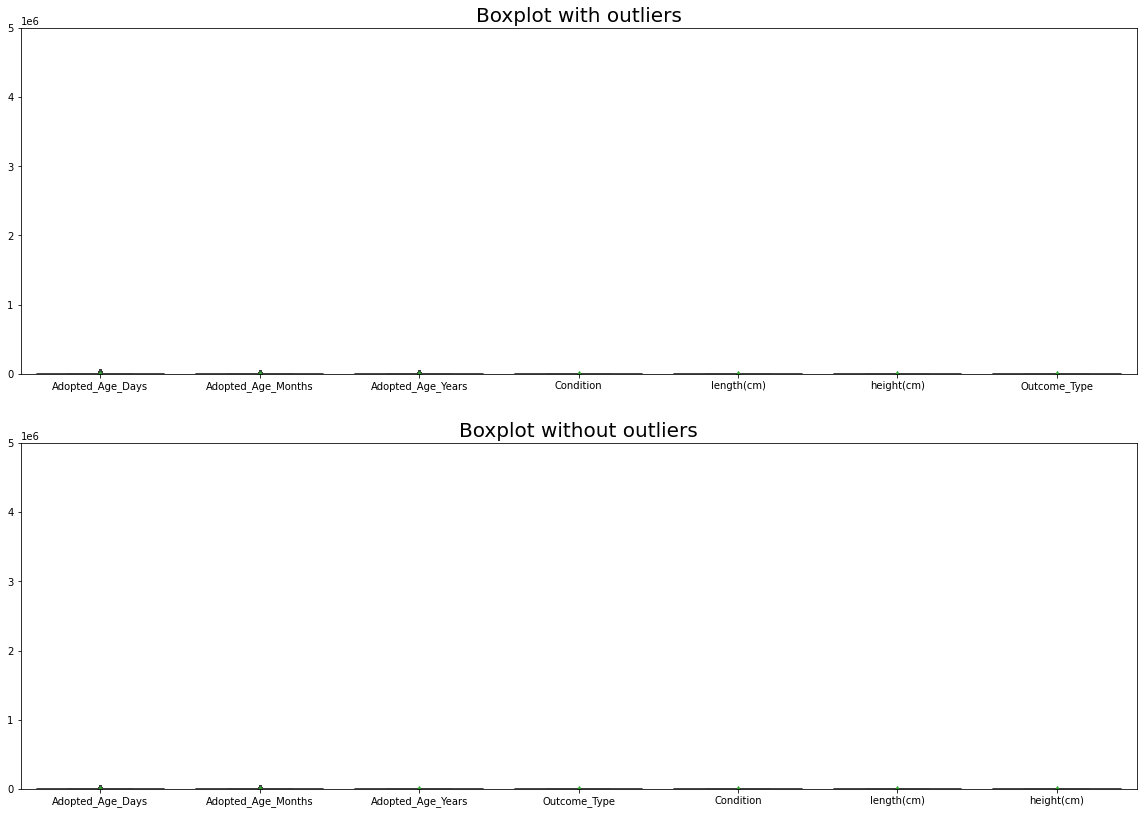

In [170]:
# Create a histogram of Price without Outliers



plt.figure(figsize=(12,8))

_ = plt.hist(mergedRes['Outcome_Type'], bins=50, alpha=0.7, label = 'Outcome_Type with outliers',)
_ = plt.hist(df1['Outcome_Type'], bins=10, alpha=0.7, label = 'Outcome_Type without outliers')

_ = plt.xlabel('Outcome_Type', fontsize=16)

_ = plt.ylabel('Number of Houses',fontsize=16)

min_ylim, max_ylim = plt.ylim()
plt.text(mergedRes['Outcome_Type'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(mergedRes['Outcome_Type'].mean()), color='blue')
plt.text(df1['Outcome_Type'].mean(), max_ylim*0.5, 'Mean: {:.2f}'.format(df1['Outcome_Type'].mean()), color='orange')

_= plt.legend(loc='upper right', prop={'size':20})



_= plt.title('Outcome_Type Histogram for the pets', fontsize=20)
plt.show()

;
# Generate boxplot without outliers by all variables except for ID and Data since they are not significant.


filt2 = ['Animal_ID','NAME','Adopted Date','Pet DOB','Adopted_Age_Days','Adopted_Age_Months','Adopted_Age_Years','Outcome_Type','Outcome_Subtype','Animal_Type','Sex_On_Adop','Breed','Color','Condition','length(cm)','height(cm)']

dff2=df1[filt2]



f, ax = plt.subplots(figsize=(20, 14))
plt.subplot(2,1,1)
fig = sns.boxplot(data=dff, showmeans=True)
fig.axis(ymin=0, ymax=5000000)
plt.title('Boxplot with outliers',fontsize=20)

;
plt.subplot(2,1,2)
fig2 = sns.boxplot(data=dff2, showmeans=True)
fig2.axis(ymin=0, ymax=5000000)
plt.title('Boxplot without outliers',fontsize=20)
;
plt.show()